# Boston Dataset

## Description of Dataset

In [1341]:
# Import pandas for analysis
import pandas as pd

# Import datasets from sklearn to access Boston Housing Dataset
from sklearn import datasets

# Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import scipy.stats for inferential statistics
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

# Import keras for machine learning/neural networks
import keras as kr

# Library for splitting into training and test sets
import sklearn.model_selection as mod

# Library for preprocessing of data for neural network
import sklearn.preprocessing as pre

# Library for whitening of data for neural network
import sklearn.decomposition as dec

In [1342]:
# Change size of plots
plt.rcParams['figure.figsize']=(15.0,10.0)

In [1343]:
# Import Boston Housing Dataset from sklearn
Boston=datasets.load_boston()

In [1344]:
# Check type of dataset
print(type(Boston))

<class 'sklearn.utils.Bunch'>


In [1345]:
# Print keys of bunch object
print(Boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [1346]:
# Print description in dataset
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [1347]:
# Print shape of data
print(Boston.data.shape)

(506, 13)


In [1348]:
# Create dataframe from data, including feature names as column names
Data=pd.DataFrame(Boston["data"], columns=Boston["feature_names"])
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [1349]:
# Print shape of target
print(Boston.target.shape)

(506,)


In [1350]:
# Create dataframe from target, including column name
Target = pd.DataFrame(Boston["target"])
Target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [1351]:
# Add target dataframe to data dataframe
Data["MEDV"]=Target
Data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [1352]:
# Check dataset for any missing values [4]
Data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [1353]:
# Print descriptive statistics of Data dataframe which combines data and target from Boston Housing Dataset
print(Data.describe().round(decimals=2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  506.00  
mean   408.24    18.46  356.67   12.65   22.53  
std    168.54     2.16   91.29    7.14    9.20  
min    187.00    12.60    0.32    1.73    5.00  
25%    279.00    17.40  3

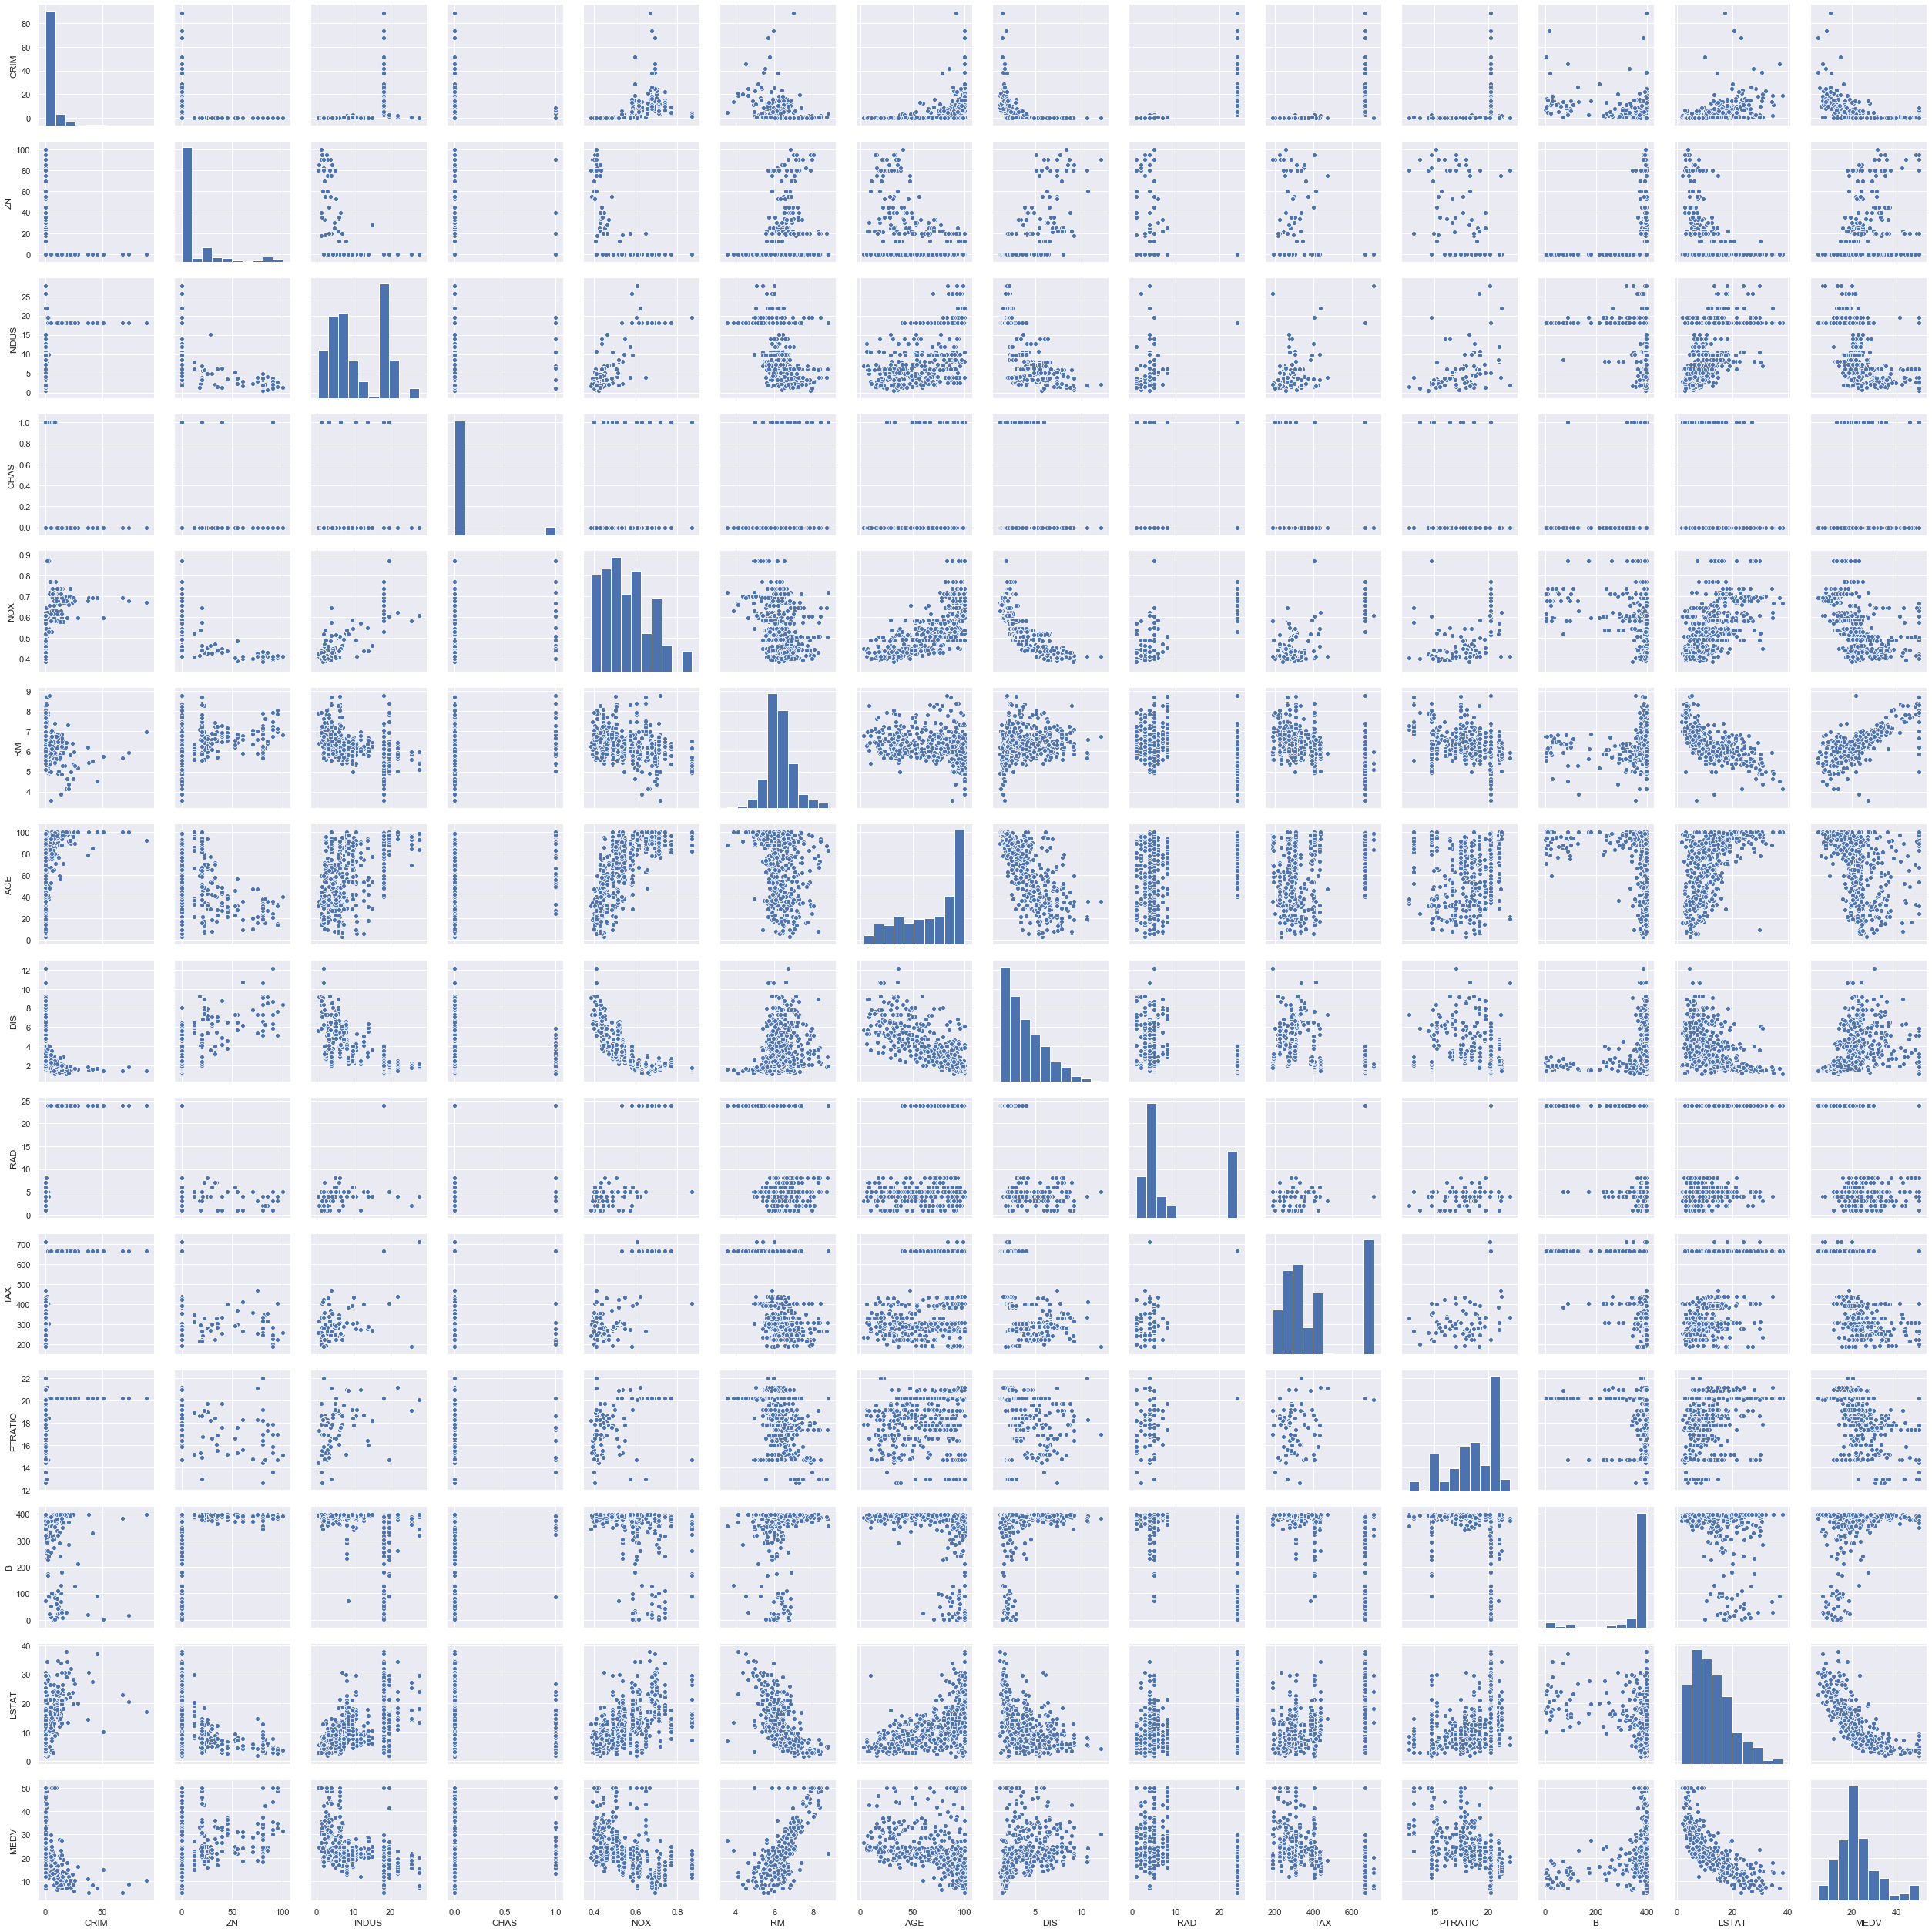

In [1354]:
# Use pairplot to compare each feature to each other feature, and show histograms of each of the features.
sns.pairplot(Data)

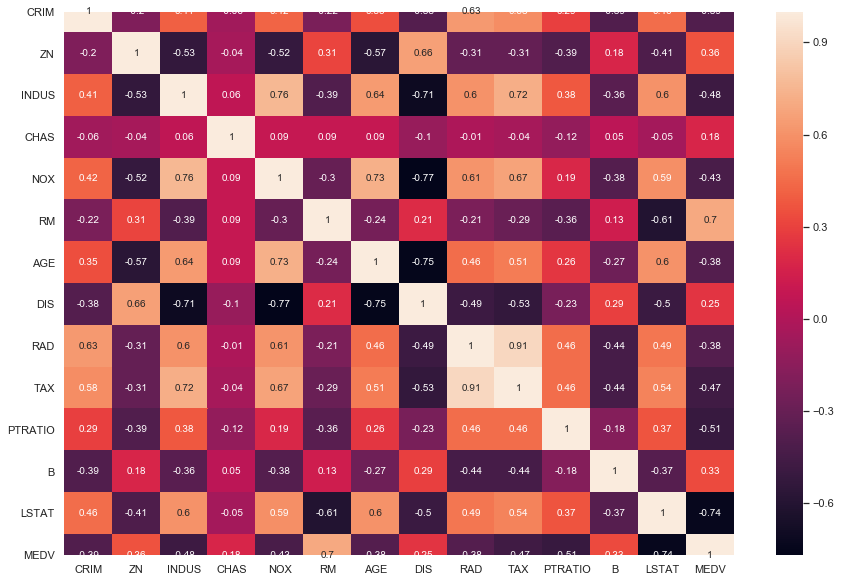

In [1355]:
# View a heatmap showing the correlation between each of the features with each other feature [4]
correlation_matrix = Data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

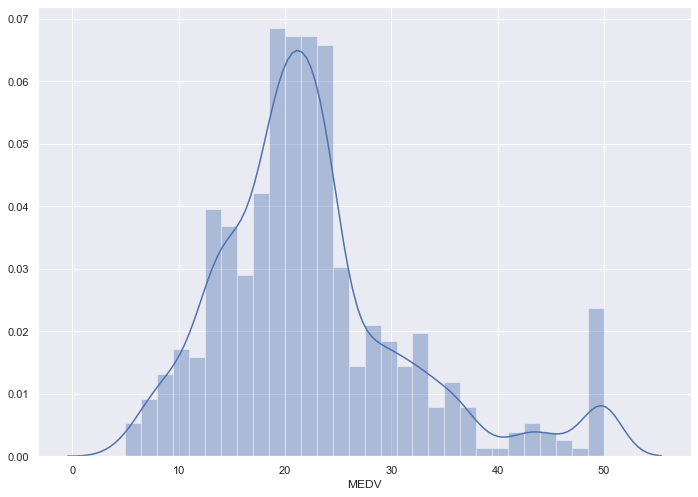

In [1356]:
# View histogram showing distribution of median value MEDV (target) values [4]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Data['MEDV'], bins=30)
plt.show()

## Inferential Statistics for Median Value of Property Bounding River vs. Median Value of Property  Not Bounding River

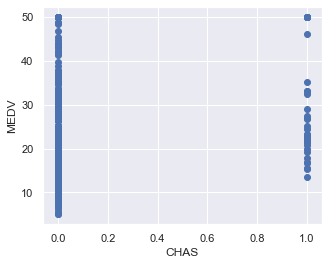

In [1357]:
# Plot median value vs. Charles River variable [5]
plt.figure(figsize=(5, 4))
plt.scatter(Data["CHAS"], Data["MEDV"])
plt.ylabel('MEDV', size=12)
plt.xlabel('CHAS', size=12)
plt.show()

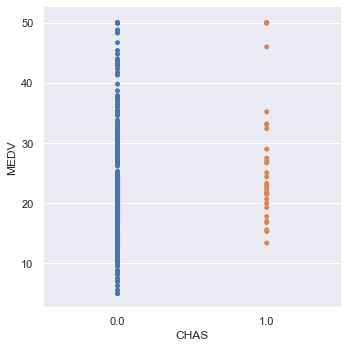

In [1358]:
# Show plot of median value (MEDV) separated by whether or not property bounds River Charles (CHAS) [6]
sns.catplot(x='CHAS', y='MEDV', jitter=False, data=Data)

In [1359]:
# Create a dataframe of median value (MEDV) where property bounds Charles River (CHAS = 1)
AtRiver=Data["MEDV"].loc[Data["CHAS"]==1]
AtRiver.head()

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
Name: MEDV, dtype: float64

In [1360]:
# Create a dataframe of median value (MEDV) where property does not bound Charles River (CHAS != 1)
NotRiver=Data["MEDV"].loc[Data["CHAS"]!=1]
NotRiver.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2b395f3d248>,
 'caps': [<matplotlib.lines.Line2D at 0x2b395f3db08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b395f38788>,
 'medians': [<matplotlib.lines.Line2D at 0x2b395f41a88>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b395f47908>,
 'means': []}

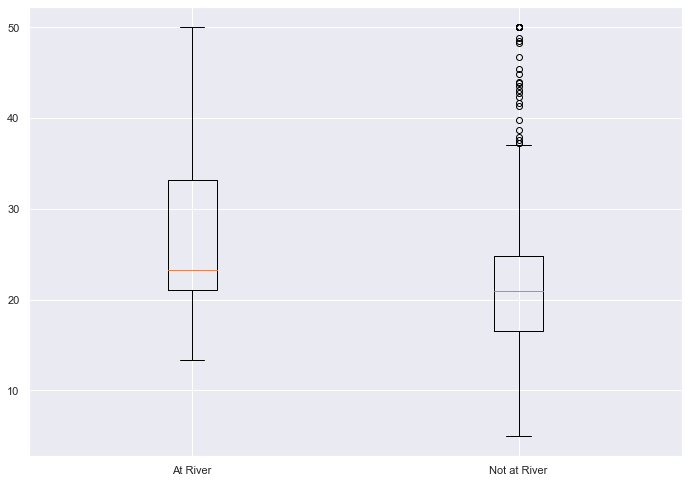

In [1361]:
# Makes a new figure
fig = plt.figure()
# Creates a 1 x 1 grid in the first subplot
ax = fig.add_subplot(111)
# Creates a boxplot for each of the datasets and labels them accordingly.
ax.boxplot([AtRiver, NotRiver], labels=['At River', 'Not at River'])

#### T-Tests

In [1362]:
# Run t-test from scipy
ss.ttest_ind(AtRiver, NotRiver)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [1363]:
# Run t-test from statsmodels
ws.ttest_ind(AtRiver, NotRiver)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

##### P-Value #####
The p-value is 7.3906e-05, or 0.0074%, indicating that the probability of drawing these sample data points from two larger datasets which have the same mean is 0.0074%. This is well below the acceptable threshold of 5% so we can reject the null hypothesis. The null hypothesis asssumes that there is no difference between the means of the datasets from which the samples were drawn. We can assume that the datasets from which these samples were drawn have different mean values.

## Neural Network

In [2435]:
Inputs = Data.iloc[:,0:13]
Outputs = Data.iloc[:,13:14]

In [2436]:
# Set parameters

Layer1_Neurons=30
Layer1_Act ='relu'

Layer2_Neurons=30
Layer2_Act ='relu'

Layer3_Neurons=10
Layer3_Act ='relu'

Layer4_Neurons=10
Layer4_Act ='relu'

Final_Layer_Act = 'linear'

Name_Inputs = ["LSTAT","RM","PTRATIO","INDUS","TAX","NOX"]
# ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
Inputs = Inputs[Name_Inputs]
No_Inputs=len(Name_Inputs)

Loss_Method = 'mae'

Opt_Method = 'sgd'

Name_Metrics = ['mape']

Proportion_Test=0.3

No_Epochs=50

No_Batch=10

##### Build a Model

In [2437]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add neurons.
model.add(kr.layers.Dense(Layer1_Neurons, input_dim=No_Inputs, activation=Layer1_Act))
model.add(kr.layers.Dense(Layer2_Neurons, input_dim=No_Inputs, activation=Layer2_Act))
#model.add(kr.layers.Dense(Layer3_Neurons, input_dim=No_Inputs, activation=Layer3_Act))
#model.add(kr.layers.Dense(Layer4_Neurons, input_dim=No_Inputs, activation=Layer4_Act))
model.add(kr.layers.Dense(1, activation=Final_Layer_Act))

# Build the graph.
model.compile(loss=Loss_Method, optimizer=Opt_Method, metrics=Name_Metrics)

#### Split

In [2438]:
# Split the inputs and outputs into training and test sets.
Inputs_Train, Inputs_Test, Outputs_Train, Outputs_Test = mod.train_test_split(Inputs, Outputs, test_size=Proportion_Test)

#### Train

In [2439]:
# Train the neural network.
model.fit(Inputs_Train, Outputs_Train, epochs=No_Epochs, batch_size=No_Batch)

Epoch 1/50
354/354 [==============================] - 0s 597us/step - loss: 66.3167 - mape: 354.5349
Epoch 2/50
354/354 [==============================] - 0s 118us/step - loss: 22.5311 - mape: 97.4937
Epoch 3/50
354/354 [==============================] - 0s 124us/step - loss: 22.1711 - mape: 95.6660
Epoch 4/50
354/354 [==============================] - 0s 124us/step - loss: 21.8111 - mape: 93.7987
Epoch 5/50
354/354 [==============================] - 0s 118us/step - loss: 21.4511 - mape: 91.9937
Epoch 6/50
354/354 [==============================] - 0s 121us/step - loss: 21.0911 - mape: 90.1563
Epoch 7/50
354/354 [==============================] - 0s 110us/step - loss: 20.7311 - mape: 88.3123
Epoch 8/50
354/354 [==============================] - ETA: 0s - loss: 17.2000 - mape: 86.54 - 0s 138us/step - loss: 20.3711 - mape: 86.4736
Epoch 9/50
354/354 [==============================] - 0s 113us/step - loss: 20.0111 - mape: 84.6192
Epoch 10/50
354/354 [==============================] - 0s 1

#### Predict

In [2440]:
# Have the network predict the MEDV of the test inputs.
Predictions = model.predict(Inputs_Test)

#### Evaluate

In [2441]:
Loss_Val = model.evaluate(Inputs_Test, Outputs_Test)

152/152 [==============================] - 0s 545us/step


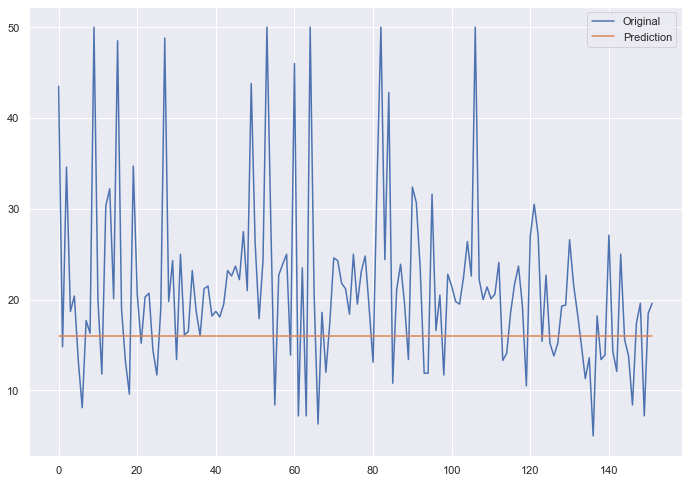

In [2442]:
Outputs_Test_Plot = pd.DataFrame.reset_index(Outputs_Test, drop=True)
plt.plot(Outputs_Test_Plot, label='Original')
plt.plot(Predictions, label='Prediction')
plt.legend()

### Scaling

In [2443]:
scaler = pre.StandardScaler()
scaler.fit(Inputs_Train)
Inputs_Train_Scaled = scaler.transform(Inputs_Train)

#### Model

In [2444]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add neurons.
model.add(kr.layers.Dense(Layer1_Neurons, input_dim=No_Inputs, activation=Layer1_Act))
model.add(kr.layers.Dense(Layer2_Neurons, input_dim=No_Inputs, activation=Layer2_Act))
#model.add(kr.layers.Dense(Layer3_Neurons, input_dim=No_Inputs, activation=Layer3_Act))
#model.add(kr.layers.Dense(Layer4_Neurons, input_dim=No_Inputs, activation=Layer4_Act))
model.add(kr.layers.Dense(1, activation=Final_Layer_Act))

# Build the graph.
model.compile(loss=Loss_Method, optimizer=Opt_Method, metrics=Name_Metrics)

#### Train

In [2445]:
# Train the neural network.
model.fit(Inputs_Train_Scaled, Outputs_Train, epochs=No_Epochs, batch_size=No_Batch)

Epoch 1/50
354/354 [==============================] - 0s 803us/step - loss: 21.5724 - mape: 92.9064
Epoch 2/50
354/354 [==============================] - 0s 118us/step - loss: 15.1107 - mape: 63.2960
Epoch 3/50
354/354 [==============================] - 0s 110us/step - loss: 5.0649 - mape: 25.5359
Epoch 4/50
354/354 [==============================] - 0s 116us/step - loss: 3.9522 - mape: 20.6797
Epoch 5/50
354/354 [==============================] - 0s 138us/step - loss: 3.5518 - mape: 18.3200
Epoch 6/50
354/354 [==============================] - 0s 163us/step - loss: 3.2658 - mape: 16.0680
Epoch 7/50
354/354 [==============================] - 0s 177us/step - loss: 3.0883 - mape: 14.9925
Epoch 8/50
354/354 [==============================] - 0s 146us/step - loss: 2.9723 - mape: 14.3324
Epoch 9/50
354/354 [==============================] - 0s 155us/step - loss: 2.9628 - mape: 13.9704
Epoch 10/50
354/354 [==============================] - 0s 161us/step - loss: 2.9213 - mape: 14.0839
Epoch 1

#### Predict

In [2446]:
Inputs_Test_Scaled = scaler.transform(Inputs_Test)
Predictions = model.predict(Inputs_Test_Scaled)

#### Evaluate

In [2447]:
Loss_Val_Scaled = model.evaluate(Inputs_Test_Scaled, Outputs_Test)

152/152 [==============================] - 0s 525us/step


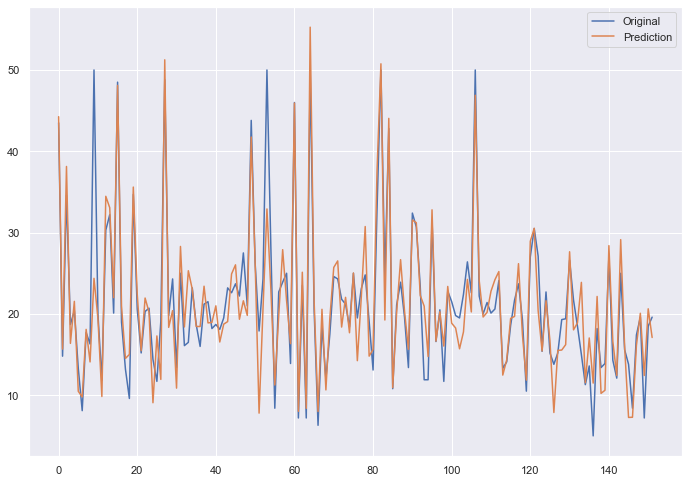

In [2448]:
Outputs_Test_Plot = pd.DataFrame.reset_index(Outputs_Test, drop=True)
plt.plot(Outputs_Test_Plot, label='Original')
plt.plot(Predictions, label='Prediction')
plt.legend()

### Whitening

In [2449]:
pca = dec.PCA(n_components=No_Inputs, whiten=True)
pca.fit(Inputs_Train)
Inputs_Train_White = pd.DataFrame(pca.transform(Inputs_Train), columns=Inputs.columns)

#### Model

In [2450]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add neurons.
model.add(kr.layers.Dense(Layer1_Neurons, input_dim=No_Inputs, activation=Layer1_Act))
model.add(kr.layers.Dense(Layer2_Neurons, input_dim=No_Inputs, activation=Layer2_Act))
#model.add(kr.layers.Dense(Layer3_Neurons, input_dim=No_Inputs, activation=Layer3_Act))
#model.add(kr.layers.Dense(Layer4_Neurons, input_dim=No_Inputs, activation=Layer4_Act))
model.add(kr.layers.Dense(1, activation=Final_Layer_Act))

# Build the graph.
model.compile(loss=Loss_Method, optimizer=Opt_Method, metrics=Name_Metrics)

#### Train

In [2451]:
# Train the neural network.
model.fit(Inputs_Train_White, Outputs_Train, epochs=No_Epochs, batch_size=No_Batch)

Epoch 1/50
354/354 [==============================] - 0s 690us/step - loss: 22.5953 - mape: 97.6414
Epoch 2/50
354/354 [==============================] - 0s 99us/step - loss: 20.6263 - mape: 87.3465
Epoch 3/50
354/354 [==============================] - 0s 96us/step - loss: 14.0481 - mape: 56.5469
Epoch 4/50
354/354 [==============================] - 0s 149us/step - loss: 4.8103 - mape: 22.9776
Epoch 5/50
354/354 [==============================] - 0s 152us/step - loss: 3.3142 - mape: 16.3625
Epoch 6/50
354/354 [==============================] - 0s 131us/step - loss: 3.0999 - mape: 15.5580
Epoch 7/50
354/354 [==============================] - 0s 116us/step - loss: 3.0460 - mape: 14.9650
Epoch 8/50
354/354 [==============================] - 0s 104us/step - loss: 2.8755 - mape: 13.8246
Epoch 9/50
354/354 [==============================] - 0s 104us/step - loss: 2.8059 - mape: 13.4621
Epoch 10/50
354/354 [==============================] - 0s 104us/step - loss: 2.7779 - mape: 13.4229
Epoch 11

#### Predict ####

In [2452]:
Inputs_Test_White = scaler.transform(Inputs_Test)
Predictions = model.predict(Inputs_Test_White)

#### Evaluate

In [2453]:
Loss_Val_White = model.evaluate(Inputs_Test_Scaled, Outputs_Test)

152/152 [==============================] - 0s 472us/step


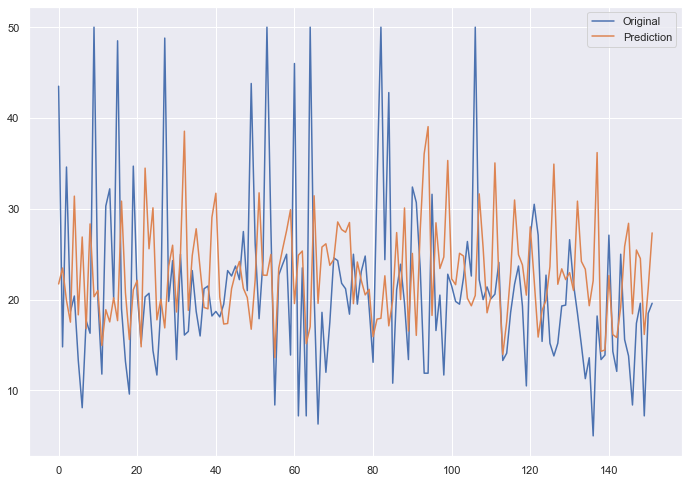

In [2454]:
Outputs_Test_Plot = pd.DataFrame.reset_index(Outputs_Test, drop=True)
plt.plot(Outputs_Test_Plot, label='Original')
plt.plot(Predictions, label='Prediction')
plt.legend()

In [2455]:
print("Original mean absolute error value = ",round(Loss_Val[0],2))
print("Original mean absolute percentage error value = ",round(Loss_Val[1],2),"%")
print("Scaled mean absolute error value = ",round(Loss_Val_Scaled[0],2))
print("Scaled mean absolute percentage error value = ",round(Loss_Val_Scaled[1],2),"%")
print("Whitened mean absolute error value = ",round(Loss_Val_White[0],2))
print("Whitened mean absolute percentage error value = ",round(Loss_Val_White[1],2),"%")

Original mean absolute error value =  7.51
Original mean absolute percentage error value =  33.58 %
Scaled mean absolute error value =  2.66
Scaled mean absolute percentage error value =  14.65 %
Whitened mean absolute error value =  8.43
Whitened mean absolute percentage error value =  46.13 %


## Sources ##
[1] Boston Standard Metropolitan Statistical Area. Boston house prices dataset.<br/>
    https://www.kaggle.com/c/boston-housing.<br/>
[2] Journal of Environmental Economics and Management. Hedonic Housing Prices and the Demand for Clean Air.<br/>
    https://www.sciencedirect.com/science/article/pii/0095069678900062.<br/>
[3] Medium. Learning Data Science: Day 9 - Linear Regression on Boston Housing Dataset.<br/>
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef.<br/>
[4] Medium. Linear Regression on Boston Housing Dataset.<br/>
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155.<br/>
[5] R-Algo. Boston Dataset scikit-learn Machine Learning in Python.<br/>
https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/<br/>
[6] GMIT. T-Tests Jupyter Notebook.<br/>
https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/ttest.ipynb<br/>
[7] scikit learn. Preprocessing data.<br/>
https://scikit-learn.org/stable/modules/preprocessing.html<br/>
[8] Medium. Understanding Activation Functions in Neural Networks.<br/>
https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0<br/>
[9]Machine Learning Mastery. How to Configure the Number of Layers and Nodes in a Neural Network. <br/>
https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/<br/>
[10]Towards Data Science. Beginners Ask “How Many Hidden Layers/Neurons to Use in Artificial Neural Networks?”. <br/>
https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e<br/>
[11] Machine Learning Mastery. How to Use Metrics for Deep Learning with Keras in Python. <br/>
https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/<br/>